In [ ]:
'''
Ahmed Shakib Reza
id: 23341130
sec: 02 (Group-1)

'''

'\nAhmed Shakib Reza\nid: 23341130\nsec: 02 (Group-1)\n\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
train_path = Path("/content/drive/MyDrive/ 428 Project/Aug_Dataset_Group1/train")
test_path = Path("/content/drive/MyDrive/ 428 Project/Group_1/Group_1/test")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model


def AlexNet(num_classes=5):
  # input
  inp = layers.Input((224, 224, 3))

  # Conv 1
  x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
  x = layers.BatchNormalization()(x)
  # pool 1
  x = layers.MaxPooling2D(3, 2)(x)

  # Conv 2
  x = layers.Conv2D(256, 5, 1, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  # pool 2
  x = layers.MaxPooling2D(3, 2)(x)

  # Conv 3
  x = layers.Conv2D(384, 3, 1, activation='relu')(x)

  # Conv 4
  x = layers.Conv2D(384, 3, 1, activation='relu')(x)

  # Conv 5
  x = layers.Conv2D(256, 3, 1, activation='relu')(x)
  # pool 3
  x = layers.MaxPooling2D(3, 2)(x)

  x = layers.Flatten()(x)

  x = layers.Dense(4096, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(4096, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(num_classes, activation='softmax')(x)
  model = Model(inputs=inp, outputs=x)
  return model

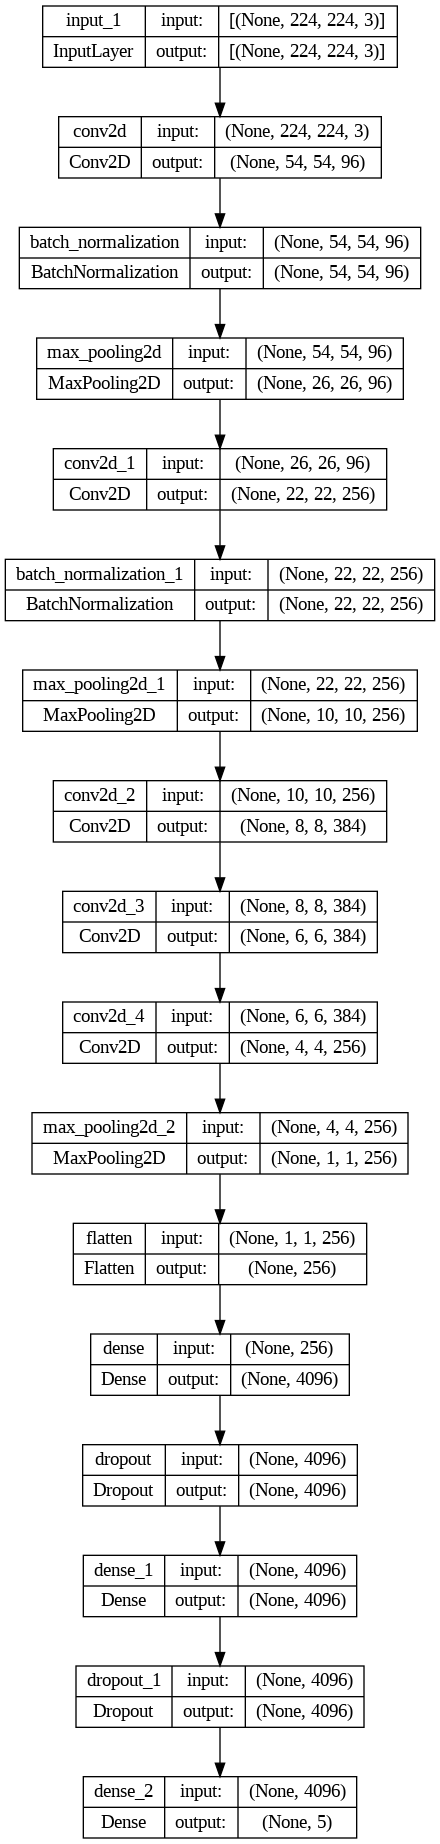

In [ ]:
# Ploting the model architecture
plot_model(model, to_file='alexnet.png', show_shapes=True, show_layer_names=True)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_AN = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_AN = validation_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)  # Ensuring shuffle is False

Found 2500 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


In [ ]:
# Model Compilation
model = AlexNet(5)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
# Callbacks
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')

In [ ]:
# Model Training
history = model.fit(
    train_AN,
    steps_per_epoch=train_AN.samples / train_AN.batch_size,
    epochs=50,
    validation_data=test_AN,
    validation_steps=test_AN.samples / test_AN.batch_size,
    callbacks=[checkpoint, early_stopping])

Epoch 1/50
79/78 [==============================] - ETA: -4s - loss: 1.6628 - accuracy: 0.3040
Epoch 1: val_accuracy improved from -inf to 0.28000, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


78/78 [==============================] - 506s 6s/step - loss: 1.6628 - accuracy: 0.3040 - val_loss: 1.6374 - val_accuracy: 0.2800
Epoch 2/50
79/78 [==============================] - ETA: 0s - loss: 1.4678 - accuracy: 0.3852
Epoch 2: val_accuracy improved from 0.28000 to 0.42000, saving model to best_model.h5
78/78 [==============================] - 8s 96ms/step - loss: 1.4678 - accuracy: 0.3852 - val_loss: 1.3832 - val_accuracy: 0.4200
Epoch 3/50
79/78 [==============================] - ETA: 0s - loss: 1.3516 - accuracy: 0.4544
Epoch 3: val_accuracy did not improve from 0.42000
78/78 [==============================] - 8s 104ms/step - loss: 1.3516 - accuracy: 0.4544 - val_loss: 1.5384 - val_accuracy: 0.3160
Epoch 4/50
79/78 [==============================] - ETA: 0s - loss: 1.2262 - accuracy: 0.5124
Epoch 4: val_accuracy improved from 0.42000 to 0.44000, saving model to best_model.h5
78/78 [==============================] - 9s 118ms/step - loss: 1.2262 - accuracy: 0.5124 - val_loss: 1.2

In [ ]:
# Loading the best model
model = load_model("best_model.h5")

# Making predictions_AN
test_AN.reset()  # Resetting generator to ensure consistent order of samples
predictions_AN = model.predict(test_AN, steps=test_AN.samples / test_AN.batch_size)
predicted_classes_AN = np.argmax(predictions_AN, axis=1)
true_classes_AN = test_AN.classes
class_labels_AN = list(test_AN.class_indices.keys())

# Print Test and Train Accuracy
# Assuming 'history' contains the training history
best_train_accuracy_AN = max(history.history['accuracy'])
best_val_accuracy_AN = max(history.history['val_accuracy'])
print(f"Best Validation (Test) Accuracy: {best_val_accuracy_AN*100:.2f}%")

7/7 [==============================] - 1s 78ms/step
Best Validation (Test) Accuracy: 69.60%


In [ ]:
# For training data

train_AN.reset()  # Resetting generator to ensure consistent order of samples
predictions_train = model.predict(train_AN, steps=train_AN.samples / train_AN.batch_size)
predicted_classes_train = np.argmax(predictions_train, axis=1)
true_classes_train = train_AN.classes
class_labels_train = list(train_AN.class_indices.keys())

# Print the best training accuracy using the history object
print(f"Best Training Accuracy: {best_train_accuracy_AN*100:.2f}%")

78/78 [==============================] - 6s 81ms/step
Best Training Accuracy: 90.52%


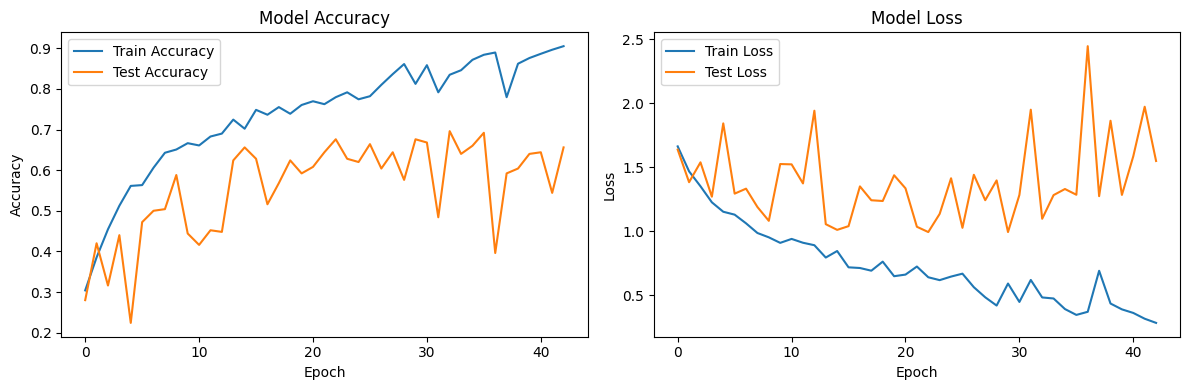

In [ ]:
# Plotting Training and Testing Accuracy and Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Overall Metrics:
Overall Sensitivity: 0.696
Overall Specificity: 0.924
Overall Positive Predictive Value (PPV): 0.697614169867691
Overall Negative Predictive Value (NPV): 0.9258841400454777
Overall F1 Score: 0.6880801243896261
------------------------------


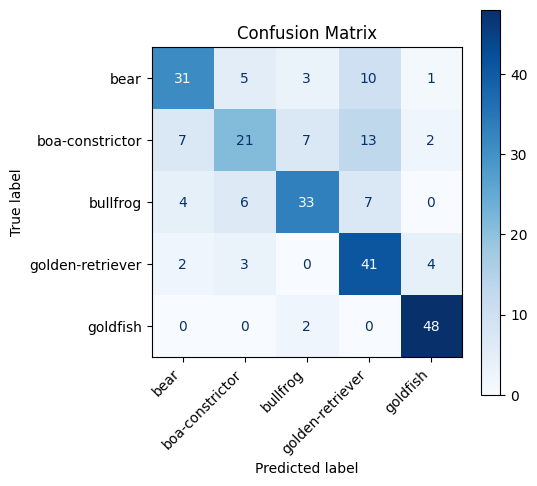

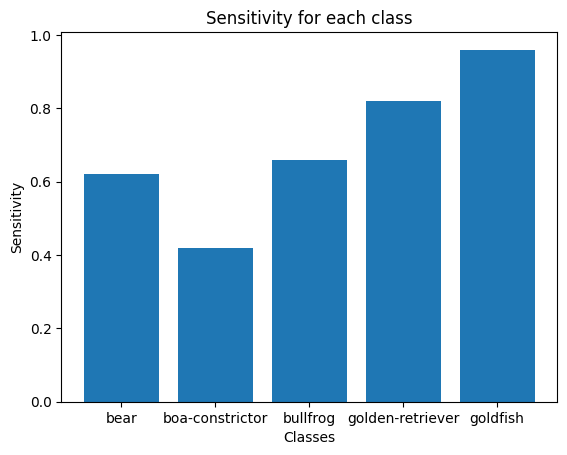

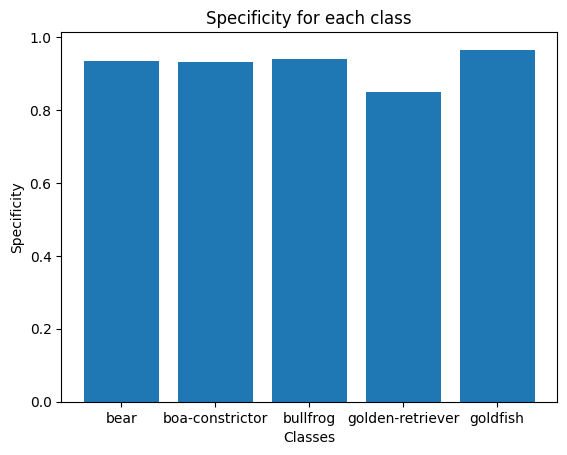

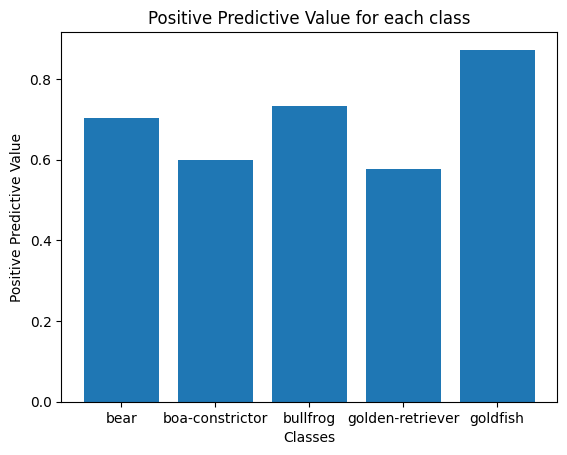

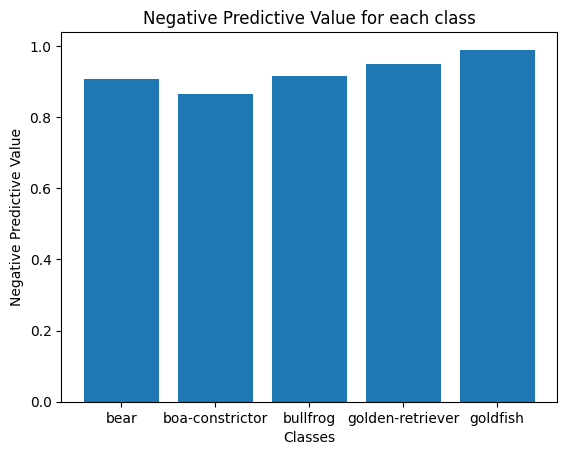

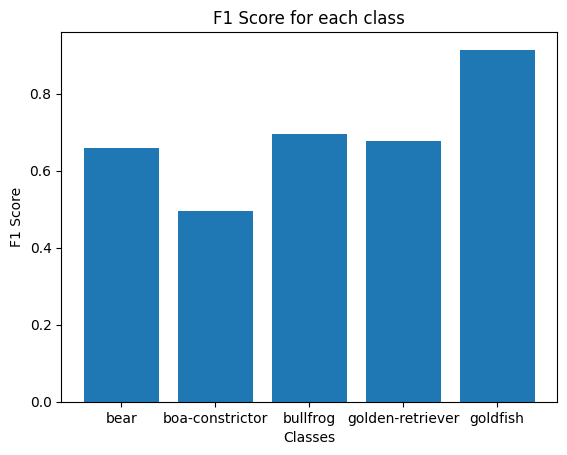

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generating confusion matrix for Test data
conf_matrix = confusion_matrix(true_classes_AN, predicted_classes_AN)

# True Positives, False Positives, False Negatives, True Negatives
TP = np.diag(conf_matrix)
FP = conf_matrix.sum(axis=0) - TP
FN = conf_matrix.sum(axis=1) - TP
TN = conf_matrix.sum() - (FP + FN + TP)

# Sensitivity, Specificity, PPV, NPV, and F1 score
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
ppv = TP / (TP + FP)
npv = TN / (TN + FN)
f1 = 2 * TP / (2 * TP + FP + FN)

# Calculate overall metrics
overall_sensitivity = np.mean(sensitivity)
overall_specificity = np.mean(specificity)
overall_ppv = np.mean(ppv)
overall_npv = np.mean(npv)
overall_f1 = np.mean(f1)

# Print overall metrics
print('Overall Metrics:')
print(f'Overall Sensitivity: {overall_sensitivity}')
print(f'Overall Specificity: {overall_specificity}')
print(f'Overall Positive Predictive Value (PPV): {overall_ppv}')
print(f'Overall Negative Predictive Value (NPV): {overall_npv}')
print(f'Overall F1 Score: {overall_f1}')
print('-' * 30)

# Plot confusion matrix
class_names = class_labels_AN  # replace with your actual class labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha="right")
plt.show()

# Plotting metrics
def plot_metrics(metric_values, metric_name, class_labels_AN):
    plt.bar(class_labels_AN, metric_values)
    plt.xlabel('Classes')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for each class')
    plt.show()

# Plotting Sensitivity, Specificity, PPV, NPV, and F1 score
plot_metrics(sensitivity, 'Sensitivity', class_labels_AN)
plot_metrics(specificity, 'Specificity', class_labels_AN)
plot_metrics(ppv, 'Positive Predictive Value', class_labels_AN)
plot_metrics(npv, 'Negative Predictive Value', class_labels_AN)
plot_metrics(f1, 'F1 Score', class_labels_AN)


Overall Metrics for Training Data:
Overall Sensitivity: 0.202
Overall Specificity: 0.8005000000000001
Overall Positive Predictive Value (PPV): 0.20075491378213978
Overall Negative Predictive Value (NPV): 0.8005825202160182
Overall F1 Score: 0.1996799010845609
------------------------------


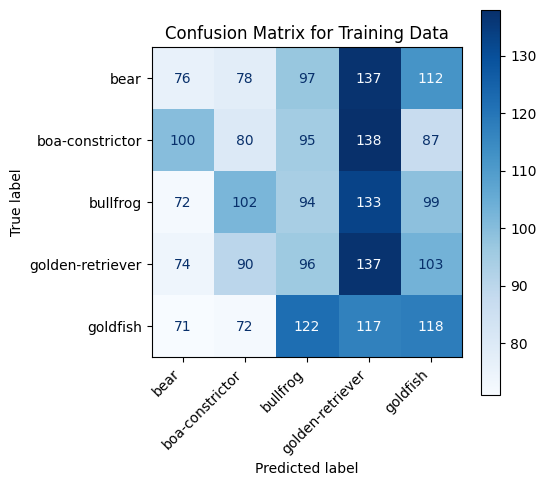

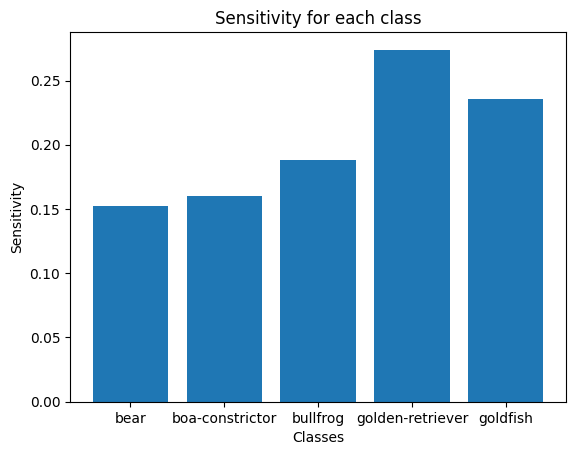

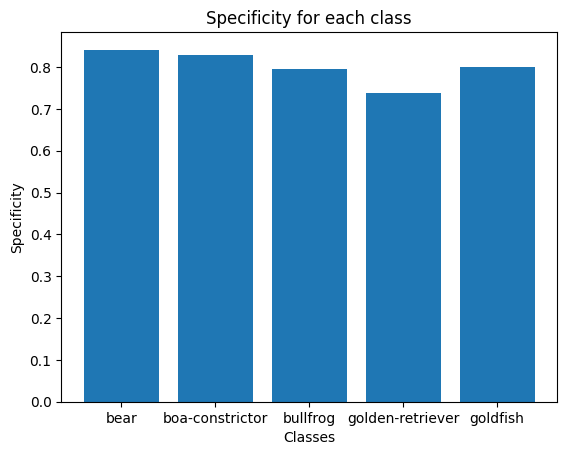

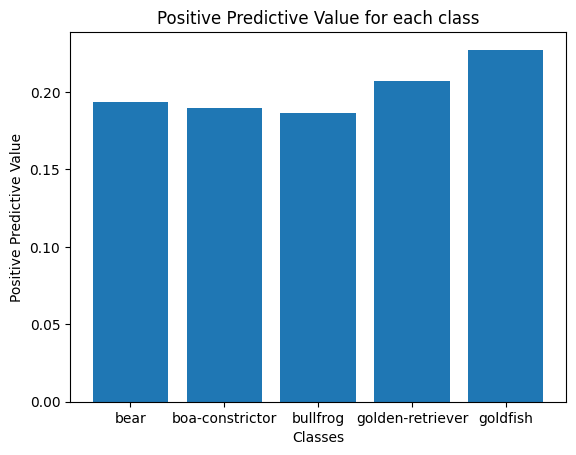

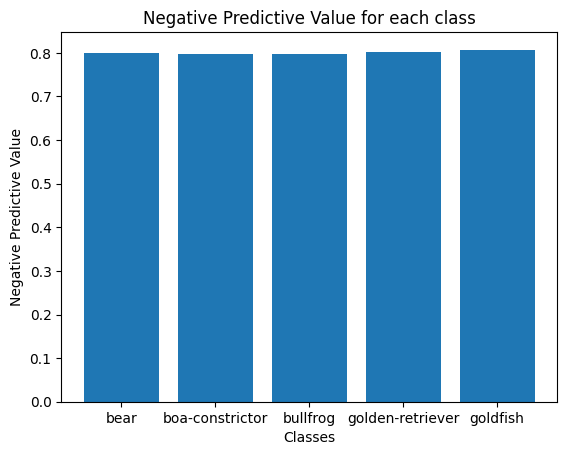

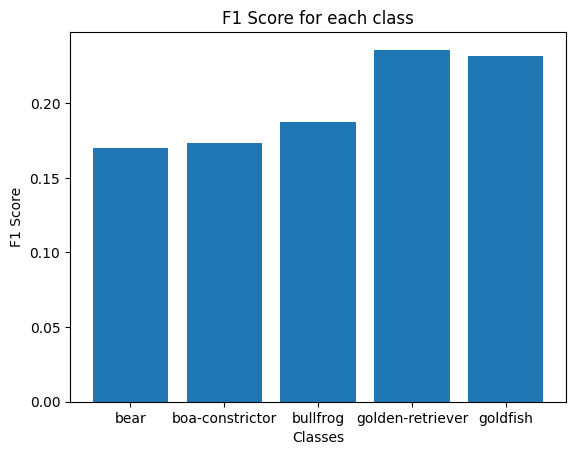

In [ ]:
# Generating confusion matrix for training data
conf_matrix_train = confusion_matrix(true_classes_train, predicted_classes_train)

# True Positives, False Positives, False Negatives, True Negatives for training data
TP_train = np.diag(conf_matrix_train)
FP_train = conf_matrix_train.sum(axis=0) - TP_train
FN_train = conf_matrix_train.sum(axis=1) - TP_train
TN_train = conf_matrix_train.sum() - (FP_train + FN_train + TP_train)

# Sensitivity, Specificity, PPV, NPV, and F1 score for training data
sensitivity_train = TP_train / (TP_train + FN_train)
specificity_train = TN_train / (TN_train + FP_train)
ppv_train = TP_train / (TP_train + FP_train)
npv_train = TN_train / (TN_train + FN_train)
f1_train = 2 * TP_train / (2 * TP_train + FP_train + FN_train)

# Calculating overall metrics for training data
overall_sensitivity_train = np.mean(sensitivity_train)
overall_specificity_train = np.mean(specificity_train)
overall_ppv_train = np.mean(ppv_train)
overall_npv_train = np.mean(npv_train)
overall_f1_train = np.mean(f1_train)

# Printing overall metrics for training data
print('Overall Metrics for Training Data:')
print(f'Overall Sensitivity: {overall_sensitivity_train}')
print(f'Overall Specificity: {overall_specificity_train}')
print(f'Overall Positive Predictive Value (PPV): {overall_ppv_train}')
print(f'Overall Negative Predictive Value (NPV): {overall_npv_train}')
print(f'Overall F1 Score: {overall_f1_train}')
print('-' * 30)

# Ploting confusion matrix for training data
class_names_train = class_labels_train
disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=class_names_train)
fig_train, ax_train = plt.subplots(figsize=(5, 5))
disp_train.plot(cmap=plt.cm.Blues, values_format='d', ax=ax_train)
plt.title('Confusion Matrix for Training Data')
plt.xticks(rotation=45, ha="right")
plt.show()

# Plotting metrics for training data
plot_metrics(sensitivity_train, 'Sensitivity', class_labels_train)
plot_metrics(specificity_train, 'Specificity', class_labels_train)
plot_metrics(ppv_train, 'Positive Predictive Value', class_labels_train)
plot_metrics(npv_train, 'Negative Predictive Value', class_labels_train)
plot_metrics(f1_train, 'F1 Score', class_labels_train)

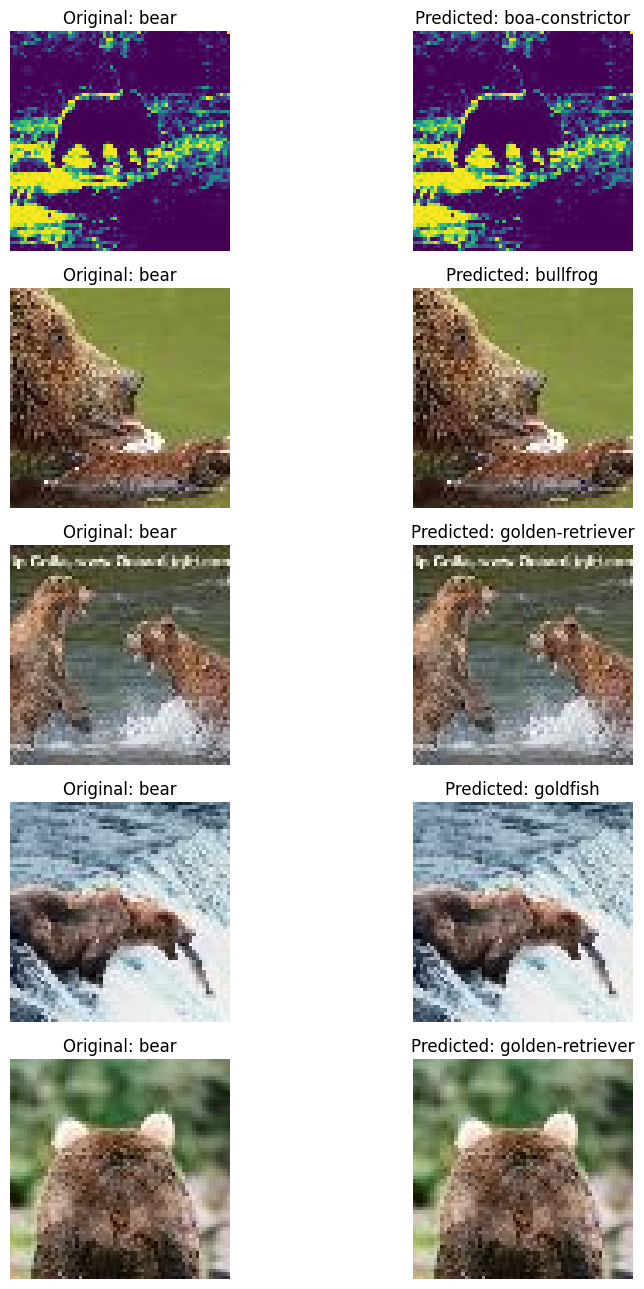

In [ ]:
# Identify misclassified images
misclassified_indices = np.where(predicted_classes_AN != true_classes_AN)[0]
if len(misclassified_indices) > 5:
    misclassified_indices = misclassified_indices[:5]

# Plotting Misclassified Images
fig, axes = plt.subplots(len(misclassified_indices), 2, figsize=(10, 13))
#fig.subplots_adjust(Wspace=3)

for i, index in enumerate(misclassified_indices):
    img_path = test_AN.filepaths[index]
    img = plt.imread(img_path)
    original_label = class_labels_AN[true_classes_AN[index]]
    predicted_label = class_labels_AN[predicted_classes_AN[index]]

    axes[i, 0].imshow(img)
    axes[i, 0].set_title(f"Original: {original_label}")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(img)
    axes[i, 1].set_title(f"Predicted: {predicted_label}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()
